In [1]:
import pandas as pd
import numpy as np

In [2]:
ap_data = pd.read_excel("exact_data_92024_log.xlsx")
ap_data = ap_data.drop('datetime',axis = 1)

In [3]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
date       121 non-null datetime64[ns]
all_num    121 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.0 KB


In [4]:
ap_data.reset_index(inplace=True, drop=True)
ap_data.head(-1)

,date,all_num
0,2019-09-20 00:00:00,0
1,2019-09-20 01:00:00,0
2,2019-09-20 02:00:00,0
3,2019-09-20 03:00:00,0
4,2019-09-20 04:00:00,0
5,2019-09-20 05:00:00,0
6,2019-09-20 06:00:00,0
7,2019-09-20 07:00:00,4
8,2019-09-20 08:00:00,11
9,2019-09-20 09:00:00,19


In [5]:
air_data = pd.read_excel(r"air_data\air92024.xlsx")

In [6]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
timestamp(Asia/Seoul)    120 non-null datetime64[ns]
temp(°C)                 120 non-null float64
humid                    120 non-null float64
co2                      120 non-null float64
voc                      120 non-null float64
pm25                     120 non-null float64
light                    120 non-null float64
noise                    120 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 7.6 KB


In [7]:
air_data.reset_index(inplace=True, drop=True)
air_data

,timestamp(Asia/Seoul),temp(°C),humid,co2,voc,pm25,light,noise
0,2019-09-20 00:00:00,25.7250,41.9375,4168.2000,561.1625,2.9250,135.3625,50.1000
1,2019-09-20 01:00:00,25.8750,43.3125,3699.7375,531.6500,3.2750,0.0000,50.0875
2,2019-09-20 02:00:00,26.0375,43.9500,3313.8625,508.0750,3.6500,0.0000,50.0750
3,2019-09-20 03:00:00,25.6625,46.5750,2379.5625,403.8250,4.6625,171.5125,51.7000
4,2019-09-20 04:00:00,25.4250,48.7875,1008.6500,209.7375,6.8500,0.0000,50.2250
5,2019-09-20 05:00:00,25.5375,50.3375,472.6750,81.7000,7.6250,0.0000,50.3500
6,2019-09-20 06:00:00,25.2125,52.3500,408.5875,66.9000,7.4375,1.0375,51.0000
7,2019-09-20 07:00:00,24.7625,55.1500,427.7750,64.6250,6.2250,391.4625,51.7125
8,2019-09-20 08:00:00,25.1375,55.2500,545.8000,104.3125,5.5875,433.3875,52.1750
9,2019-09-20 09:00:00,24.9625,51.4750,682.5250,101.7875,5.2250,470.1000,52.7000


In [8]:
#파일 불러오기
real_air = pd.read_csv('용봉동2026.csv', engine='python')

In [9]:
real_air = real_air[:120]

In [10]:
real_air.reset_index(inplace=True, drop=True)
real_air.head(-1)

,day,time,humid,rain?,temp,windpower
0,20,0,67,0,20.900000,0.7
1,20,100,64,0,22.100000,0.8
2,20,200,62,0,22.500000,0.2
3,20,300,55,0,24.100000,1.4
4,20,400,51,0,24.500000,2.7
5,20,500,48,0,24.600000,3.9
6,20,600,52,0,23.600000,4.0
7,20,700,53,0,23.200001,3.3
8,20,800,58,0,22.500000,3.0
9,20,900,63,0,21.700001,3.6


In [11]:
result = pd.concat([ap_data,air_data,real_air], axis = 1)

In [12]:
result = result.drop(['day', 'time', 'timestamp(Asia/Seoul)'], axis = 1)

In [13]:
result = result.drop(120, axis = 0)

In [14]:
result

,date,all_num,temp(°C),humid,co2,voc,pm25,light,noise,humid,rain?,temp,windpower
0,2019-09-20 00:00:00,0,25.7250,41.9375,4168.2000,561.1625,2.9250,135.3625,50.1000,67.0,0.0,20.900000,0.7
1,2019-09-20 01:00:00,0,25.8750,43.3125,3699.7375,531.6500,3.2750,0.0000,50.0875,64.0,0.0,22.100000,0.8
2,2019-09-20 02:00:00,0,26.0375,43.9500,3313.8625,508.0750,3.6500,0.0000,50.0750,62.0,0.0,22.500000,0.2
3,2019-09-20 03:00:00,0,25.6625,46.5750,2379.5625,403.8250,4.6625,171.5125,51.7000,55.0,0.0,24.100000,1.4
4,2019-09-20 04:00:00,0,25.4250,48.7875,1008.6500,209.7375,6.8500,0.0000,50.2250,51.0,0.0,24.500000,2.7
5,2019-09-20 05:00:00,0,25.5375,50.3375,472.6750,81.7000,7.6250,0.0000,50.3500,48.0,0.0,24.600000,3.9
6,2019-09-20 06:00:00,0,25.2125,52.3500,408.5875,66.9000,7.4375,1.0375,51.0000,52.0,0.0,23.600000,4.0
7,2019-09-20 07:00:00,4,24.7625,55.1500,427.7750,64.6250,6.2250,391.4625,51.7125,53.0,0.0,23.200001,3.3
8,2019-09-20 08:00:00,11,25.1375,55.2500,545.8000,104.3125,5.5875,433.3875,52.1750,58.0,0.0,22.500000,3.0
9,2019-09-20 09:00:00,19,24.9625,51.4750,682.5250,101.7875,5.2250,470.1000,52.7000,63.0,0.0,21.700001,3.6


In [15]:
result['date_day'] = result['date'].dt.day
result['date_hour'] = result['date'].dt.hour
result['date_weekday'] = result['date'].dt.dayofweek

In [16]:
result = result.set_index('date')

In [17]:
result

,all_num,temp(°C),humid,co2,voc,pm25,light,noise,humid,rain?,temp,windpower,date_day,date_hour,date_weekday
date,,,,,,,,,,,,,,,
2019-09-20 00:00:00,0,25.7250,41.9375,4168.2000,561.1625,2.9250,135.3625,50.1000,67.0,0.0,20.900000,0.7,20,0,4
2019-09-20 01:00:00,0,25.8750,43.3125,3699.7375,531.6500,3.2750,0.0000,50.0875,64.0,0.0,22.100000,0.8,20,1,4
2019-09-20 02:00:00,0,26.0375,43.9500,3313.8625,508.0750,3.6500,0.0000,50.0750,62.0,0.0,22.500000,0.2,20,2,4
2019-09-20 03:00:00,0,25.6625,46.5750,2379.5625,403.8250,4.6625,171.5125,51.7000,55.0,0.0,24.100000,1.4,20,3,4
2019-09-20 04:00:00,0,25.4250,48.7875,1008.6500,209.7375,6.8500,0.0000,50.2250,51.0,0.0,24.500000,2.7,20,4,4
2019-09-20 05:00:00,0,25.5375,50.3375,472.6750,81.7000,7.6250,0.0000,50.3500,48.0,0.0,24.600000,3.9,20,5,4
2019-09-20 06:00:00,0,25.2125,52.3500,408.5875,66.9000,7.4375,1.0375,51.0000,52.0,0.0,23.600000,4.0,20,6,4
2019-09-20 07:00:00,4,24.7625,55.1500,427.7750,64.6250,6.2250,391.4625,51.7125,53.0,0.0,23.200001,3.3,20,7,4
2019-09-20 08:00:00,11,25.1375,55.2500,545.8000,104.3125,5.5875,433.3875,52.1750,58.0,0.0,22.500000,3.0,20,8,4


In [18]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2019-09-20 00:00:00 to 2019-09-24 23:00:00
Data columns (total 15 columns):
all_num         120 non-null int64
temp(°C)        120 non-null float64
humid           120 non-null float64
co2             120 non-null float64
voc             120 non-null float64
pm25            120 non-null float64
light           120 non-null float64
noise           120 non-null float64
humid           120 non-null float64
rain?           120 non-null float64
temp            120 non-null float64
windpower       120 non-null float64
date_day        120 non-null int64
date_hour       120 non-null int64
date_weekday    120 non-null int64
dtypes: float64(11), int64(4)
memory usage: 15.0 KB


In [19]:
result.shape


(120, 15)

In [20]:
result.corr()

,all_num,temp(°C),humid,co2,voc,pm25,light,noise,humid,rain?,temp,windpower,date_day,date_hour,date_weekday
all_num,1.000000,0.443966,-0.413392,0.360004,0.281681,0.246154,0.625971,0.781485,0.317740,-0.066520,-0.488190,-0.239125,-0.024491,5.504403e-01,-2.641549e-01
temp(°C),0.443966,1.000000,-0.793429,0.458096,0.454451,0.417165,0.258049,0.233720,0.307534,-0.064047,-0.363820,-0.329955,-0.022434,1.173716e-01,-2.824894e-01
humid,-0.413392,-0.793429,1.000000,-0.477133,-0.425472,-0.514383,-0.109472,-0.170217,-0.094570,0.060596,0.077889,0.330822,0.284665,-2.193763e-02,1.879870e-01
co2,0.360004,0.458096,-0.477133,1.000000,0.958703,0.065029,0.102789,0.212062,0.211845,0.075217,-0.249764,-0.251201,-0.169427,3.989918e-01,-1.384327e-01
voc,0.281681,0.454451,-0.425472,0.958703,1.000000,0.106975,0.074382,0.156662,0.250282,0.089297,-0.265678,-0.232917,-0.120882,4.017428e-01,-1.387831e-01
pm25,0.246154,0.417165,-0.514383,0.065029,0.106975,1.000000,0.087476,0.217914,-0.206717,-0.272423,0.157149,-0.380839,-0.043178,3.335126e-02,-3.136483e-01
light,0.625971,0.258049,-0.109472,0.102789,0.074382,0.087476,1.000000,0.792925,0.242062,-0.132142,-0.414984,-0.337657,0.114705,5.837845e-01,-2.131696e-01
noise,0.781485,0.233720,-0.170217,0.212062,0.156662,0.217914,0.792925,1.000000,0.292795,-0.149046,-0.496989,-0.366547,0.114246,6.837927e-01,-3.125659e-01
humid,0.317740,0.307534,-0.094570,0.211845,0.250282,-0.206717,0.242062,0.292795,1.000000,0.551490,-0.931637,0.145032,-0.086189,4.845164e-01,2.586274e-01
rain?,-0.066520,-0.064047,0.060596,0.075217,0.089297,-0.272423,-0.132142,-0.149046,0.551490,1.000000,-0.332051,0.478295,-0.394640,-2.780192e-03,4.571918e-01


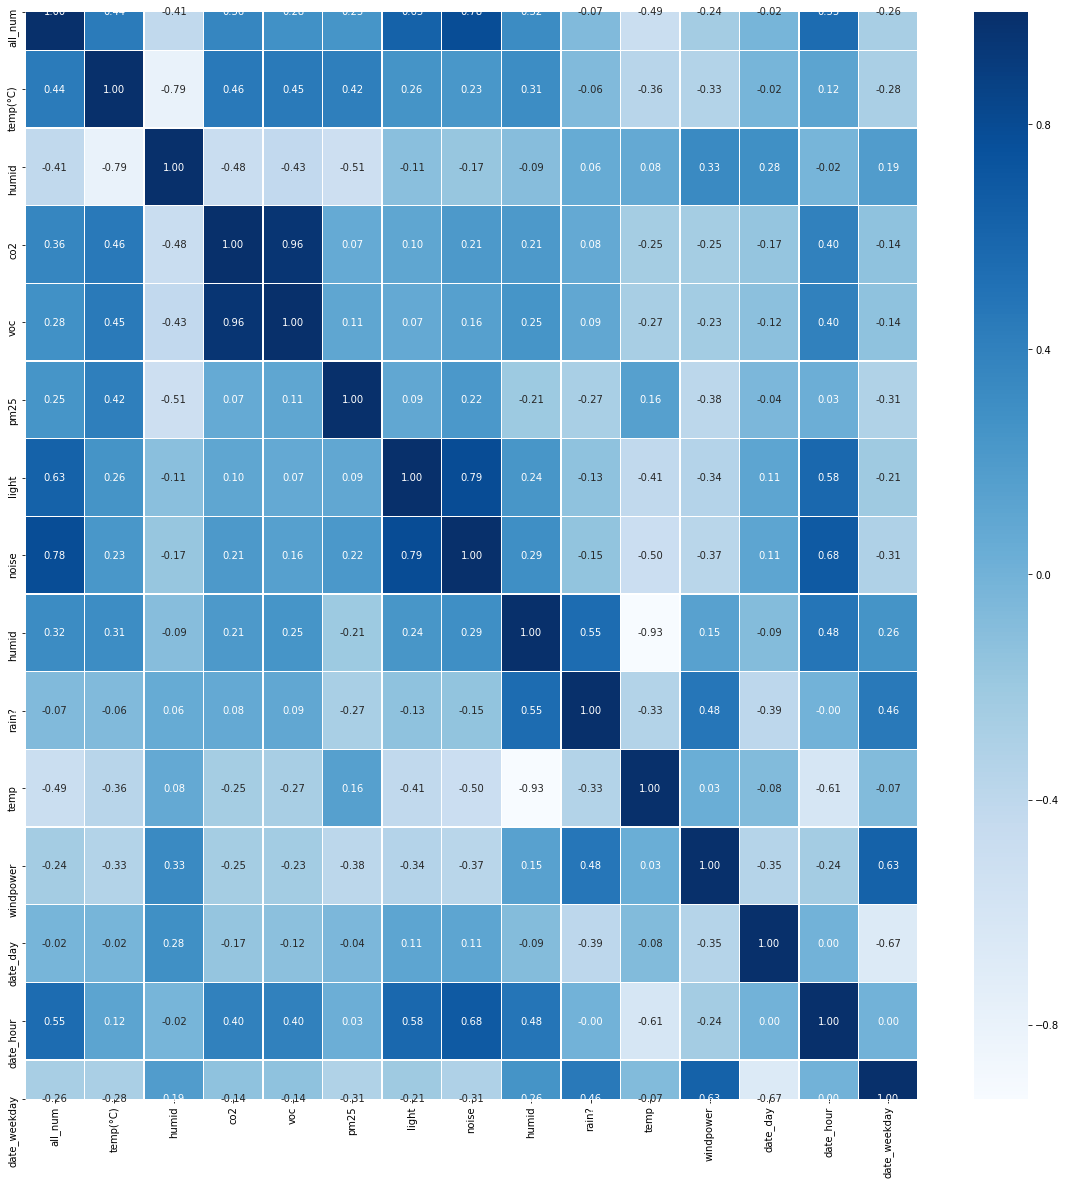

In [21]:
#https://wikidocs.net/45481
#https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D
#https://gomguard.tistory.com/173

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,20))
sns.heatmap(data = result.corr(), annot=True,
fmt = '.2f', linewidths = .5, cmap = 'Blues')

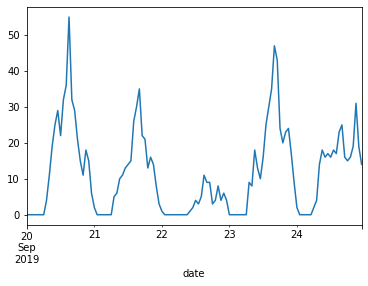

In [22]:
result['all_num']['2019-09-20' : '2019-09-25'].plot()

In [23]:
target_data = 'all_num'
shift_days = 1
shift_steps = shift_days * 24

In [24]:
result_targets = result[target_data].shift(-shift_steps)

In [25]:
result_targets

date
2019-09-20 00:00:00    2.0
2019-09-20 01:00:00    0.0
2019-09-20 02:00:00    0.0
2019-09-20 03:00:00    0.0
2019-09-20 04:00:00    0.0
                      ... 
2019-09-24 19:00:00    NaN
2019-09-24 20:00:00    NaN
2019-09-24 21:00:00    NaN
2019-09-24 22:00:00    NaN
2019-09-24 23:00:00    NaN
Name: all_num, Length: 120, dtype: float64

In [26]:
x_data = result.values[0:-shift_steps]
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (96, 15)


In [27]:
y_data = result_targets.values[:-shift_steps]
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (96,)


In [28]:
num_data = len(x_data)
num_data


96

In [29]:
train_split = 0.9

In [30]:
num_train = int(train_split * num_data)
num_train

86

In [31]:
num_test = num_data - num_train
num_test

10

In [32]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

96

In [33]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

96

In [34]:
num_x_signals = x_data.shape[1]
num_y_signals = 1
num_x_signals

15

In [35]:
y_data

array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  6., 10., 11., 13., 14.,
       15., 26., 30., 35., 22., 21., 13., 16., 14.,  8.,  3.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  4.,  3.,  5.,
       11.,  9.,  9.,  3.,  4.,  8.,  4.,  6.,  4.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  9.,  8., 18., 13., 10., 16., 25., 30., 35., 47.,
       43., 24., 20., 23., 24., 17.,  9.,  2.,  0.,  0.,  0.,  0.,  0.,
        2.,  4., 14., 18., 16., 17., 16., 18., 17., 23., 25., 16., 15.,
       16., 19., 31., 19., 14.])

In [36]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: 0.0
Max: 4168.2


In [37]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()

In [38]:
x_train_scaled = x_scaler.fit_transform(x_train)

In [39]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0000000000000002


In [40]:
x_test_scaled = x_scaler.transform(x_test)


In [41]:
y_scaler = MinMaxScaler()
y_train_scaled = y_train.reshape(-1, 1)
y_test_scaled = y_test.reshape(-1, 1)

In [42]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(86, 15)
(86, 1)


In [43]:
def batch_generator(batch_size, sequence_length):
     """
     Generator function for creating random batches of training-data.
     """
     # Infinite loop.
     while True:
         # Allocate a new array for the batch of input-signals.
         x_shape = (batch_size, sequence_length, num_x_signals)
         x_batch = np.zeros(shape=x_shape, dtype=np.float16)
         # Allocate a new array for the batch of output-signals.
         y_shape = (batch_size, sequence_length, num_y_signals)
         y_batch = np.zeros(shape=y_shape, dtype=np.float16)
         # Fill the batch with random sequences of data.
         for i in range(batch_size):
             # Get a random start-index.
             # This points somewhere into the training-data.
             idx = np.random.randint(num_train - sequence_length)

             # Copy the sequences of data starting at this index.
             x_batch[i] = x_train_scaled[idx:idx+sequence_length]
             y_batch[i] = y_train_scaled[idx:idx+sequence_length]

         yield (x_batch, y_batch)

In [44]:
batch_size = 12
sequence_length = 24 * 3 #5일
sequence_length

72

In [45]:
generator = batch_generator(batch_size=batch_size,sequence_length=sequence_length)

In [46]:
x_batch, y_batch = next(generator)

In [47]:
print(x_batch.shape)
print(y_batch.shape)

(12, 72, 15)
(12, 72, 1)


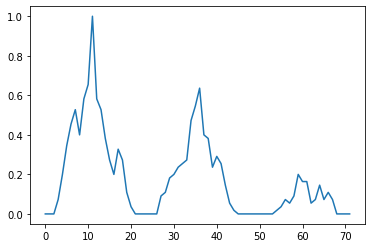

In [48]:
batch = 0 # First sequence in the batch.
signal = 0 # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

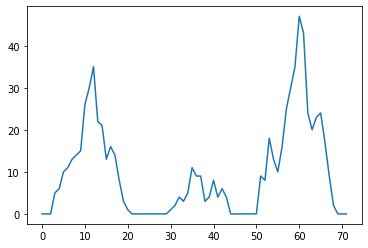

In [49]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [50]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
 np.expand_dims(y_test_scaled, axis=0))

In [51]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

import pandas as pd
import numpy as np
import tensorflow as tf

Using TensorFlow backend.
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\envs\tensor

In [52]:
model = Sequential()
model.add(GRU(units=256,
 return_sequences=True,
 input_shape=(None, num_x_signals,)))
model.add(Dense(1, activation='sigmoid'))

W1017 19:33:27.331869 17808 deprecation.py:506] From C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [53]:
warmup_steps = 10

In [54]:
def loss_mse_warmup(y_true, y_pred):
     y_true_slice = y_true[:, warmup_steps:, :]
     y_pred_slice = y_pred[:, warmup_steps:, :]
     # These sliced tensors both have this shape:
     # [batch_size, sequence_length - warmup_steps, num_y_signals]
     # Calculate the MSE loss for each value in these tensors.
     # This outputs a 3-rank tensor of the same shape.
     loss = tf.losses.mean_squared_error(labels=y_true_slice,
     predictions=y_pred_slice)
     # Keras may reduce this across the first axis (the batch)
     # but the semantics are unclear, so to be sure we use
     # the loss across the entire tensor, we reduce it to a
     # single scalar with the mean function.
     loss_mean = tf.reduce_mean(loss)
     return loss_mean
        

In [55]:
optimizer = RMSprop(lr=1e-3)
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

W1017 19:33:27.724980 17808 deprecation.py:323] From C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\losses\losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 256)         208896    
_________________________________________________________________
dense (Dense)                (None, None, 1)           257       
Total params: 209,153
Trainable params: 209,153
Non-trainable params: 0
_________________________________________________________________


In [57]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
 monitor='val_loss',
verbose=1,
save_weights_only=True,
save_best_only=True)

In [58]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
 patience=5, verbose=1)

In [59]:
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
 histogram_freq=0,
write_graph=False)

In [60]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
 factor=0.1,
min_lr=1e-4,
patience=0,
verbose=1)

In [61]:
callbacks = [callback_early_stopping,
 callback_checkpoint,
 callback_tensorboard,
 callback_reduce_lr]

In [62]:
%%time
model.fit_generator(generator=generator,
 epochs=20,
 steps_per_epoch=100,
 validation_data=validation_data,
 callbacks=callbacks)

Epoch 1/20
 99/100 [============================>.] - ETA: 0s - loss: 201.7977
Epoch 00001: val_loss improved from inf to 0.00000, saving model to 23_checkpoint.keras
100/100 [==============================] - 27s 272ms/step - loss: 201.8632 - val_loss: 0.0000e+00
Epoch 2/20
 99/100 [============================>.] - ETA: 0s - loss: 200.5883
Epoch 00002: val_loss did not improve from 0.00000

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
100/100 [==============================] - 24s 239ms/step - loss: 200.6570 - val_loss: 0.0000e+00
Epoch 3/20
 99/100 [============================>.] - ETA: 0s - loss: 199.5872
Epoch 00003: val_loss did not improve from 0.00000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0001.
100/100 [==============================] - 24s 235ms/step - loss: 199.5994 - val_loss: 0.0000e+00
Epoch 4/20
 99/100 [============================>.] - ETA: 0s - loss: 200.2273
Epoch 00004: val_loss did not improve from 0.00000
1

In [63]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
 y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 5ms/sample - loss: 0.0000e+00


In [64]:
print("loss (test-set):", result)

loss (test-set): 0.0
